In [1]:
# Import essential libraries for data analysis and visualization
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import seaborn as sns  # For visualizations
import matplotlib.pyplot as plt  # For plotting
from scipy.stats import zscore  # For outlier detection using Z-scores

# Enable inline plotting in Jupyter
%matplotlib inline
# Load Benin dataset from the data folder (relative path from notebook/)
df = pd.read_csv('../data/sierraleone-bumbuna.csv')

# Display the first 5 rows to understand the structure
df.head()
# Show the number of rows and columns in the dataset
print(f"Shape of the dataset: {df.shape}")




Shape of the dataset: (525600, 19)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [3]:
# Generate summary statistics for all numeric columns
df.describe()



,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [4]:
# Count missing values in each column
missing_counts = df.isna().sum()

# Calculate % of missing data in each column
missing_percent = (missing_counts / len(df)) * 100

# Combine into one DataFrame
missing_report = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percent Missing': missing_percent
})

# Filter for columns with more than 5% missing
missing_report[missing_report['Percent Missing'] > 5]


,Missing Values,Percent Missing
Comments,525600,100.0


In [5]:
# Select columns of interest for Z-score outlier detection
z_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Drop rows with missing values in those columns to avoid errors during z-score calculation
df_clean_z = df[z_columns].dropna()

# Calculate Z-scores for the selected columns
z_scores = np.abs(zscore(df_clean_z))

# Create a boolean mask where any Z-score > 3 is considered an outlier
outlier_mask = (z_scores > 3)

# Count how many outliers there are in each column
outlier_summary = pd.DataFrame(outlier_mask, columns=z_columns).sum()
outlier_summary


GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64

In [6]:
# Impute missing numeric values with median of each column
df_imputed = df.copy()
for col in z_columns:
    if df_imputed[col].isna().sum() > 0:
        df_imputed[col].fillna(df_imputed[col].median(), inplace=True)

# Check if any missing values remain
df_imputed.isna().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [7]:
# Combine the Z-score mask with the original DataFrame's indices
non_outliers_mask = (np.abs(zscore(df_imputed[z_columns])) < 3).all(axis=1)

# Create new cleaned DataFrame without outliers
df_cleaned = df_imputed[non_outliers_mask]

# Show shape before and after dropping outliers
print(f"Before outlier removal: {df_imputed.shape}")
print(f"After outlier removal: {df_cleaned.shape}")


Before outlier removal: (525600, 19)
After outlier removal: (509308, 19)


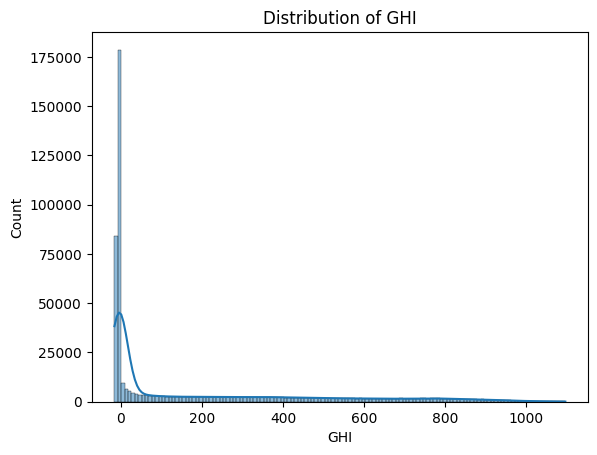

In [8]:
# Plot the distribution of GHI (Global Horizontal Irradiance)
sns.histplot(df_cleaned['GHI'], kde=True)
plt.title("Distribution of GHI")
plt.show()


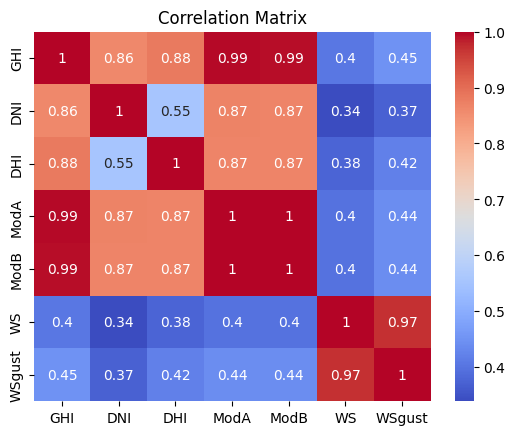

In [9]:
# Plot heatmap to see correlation between sensor features
sns.heatmap(df_cleaned[z_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
